# Fitting

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
from GNN import BinarizationGNN

%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport GNN

In [2]:
def readdata(trainlabelpath):
    trainlabel = list()
    traingraph = list()
    for path in trainlabelpath:
        with open(path, 'r') as f:
            trainlabel.append(int(f.readline()))
        graphpath = path.replace('_label', '_graph')
        graph = list()
        with open(graphpath, 'r') as g:
            g = list(g)
        for l in g[1:]:
            graph.append(list(map(int, l.split())))
        traingraph.append(graph)
    traingraph = np.array(traingraph)
    return traingraph, trainlabel

In [3]:
TRAINLABELPATH = "../datasets/train/*_label.txt"
trainlabelpath = np.random.permutation(glob.glob(TRAINLABELPATH))
print(len(trainlabelpath))

2000


### Use 1500 datas for train and 500 datas for validation

In [4]:
traingraph, trainlabel = readdata(trainlabelpath)
learngraph = traingraph[:1500]
learnlabel = trainlabel[:1500]
validgraph = traingraph[1500:]
validlabel = trainlabel[1500:]

### Check decay

In [5]:
%%time
gnn = BinarizationGNN(epoch=1, batch_size=10)
learn_loss = list()
valid_loss = list()
learn_prob = list()
valid_prob = list()

epoch = 200
learn_loss.append(gnn.loss(learngraph, learnlabel))
valid_loss.append(gnn.loss(validgraph, validlabel))
learn_prob.append(gnn.predict_prob(learngraph, learnlabel))
valid_prob.append(gnn.predict_prob(validgraph, validlabel))
for i in range(epoch):
    print(f'epoch {i+1} start')
    gnn.fit(learngraph, learnlabel)
    learn_loss.append(gnn.loss(learngraph, learnlabel))
    valid_loss.append(gnn.loss(validgraph, validlabel))
    learn_prob.append(gnn.predict_prob(learngraph, learnlabel))
    valid_prob.append(gnn.predict_prob(validgraph, validlabel))


epoch 1 start
epoch 2 start
epoch 3 start
epoch 4 start
epoch 5 start
epoch 6 start
epoch 7 start
epoch 8 start
epoch 9 start
epoch 10 start
epoch 11 start
epoch 12 start
epoch 13 start
epoch 14 start
epoch 15 start
epoch 16 start
epoch 17 start
epoch 18 start
epoch 19 start
epoch 20 start
epoch 21 start
epoch 22 start
epoch 23 start
epoch 24 start
epoch 25 start
epoch 26 start
epoch 27 start
epoch 28 start
epoch 29 start
epoch 30 start
epoch 31 start
epoch 32 start
epoch 33 start
epoch 34 start
epoch 35 start
epoch 36 start
epoch 37 start
epoch 38 start
epoch 39 start
epoch 40 start
epoch 41 start
epoch 42 start
epoch 43 start
epoch 44 start
epoch 45 start
epoch 46 start
epoch 47 start
epoch 48 start
epoch 49 start
epoch 50 start
epoch 51 start
epoch 52 start
epoch 53 start
epoch 54 start
epoch 55 start
epoch 56 start
epoch 57 start
epoch 58 start
epoch 59 start
epoch 60 start
epoch 61 start
epoch 62 start
epoch 63 start
epoch 64 start
epoch 65 start
epoch 66 start
epoch 67 start
epoc

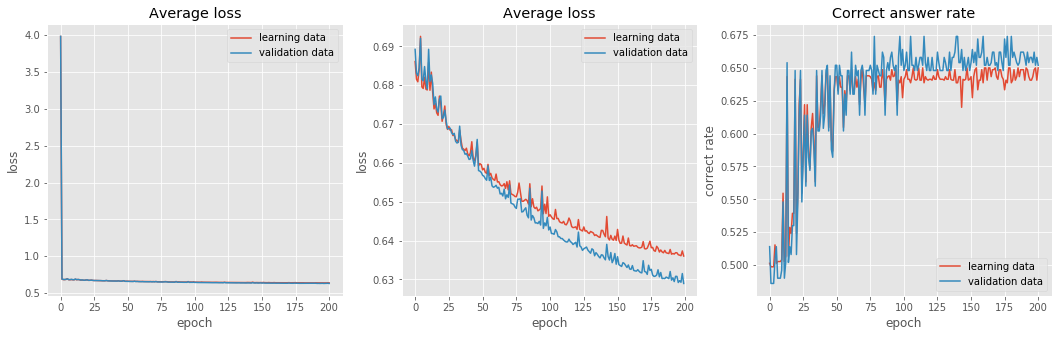

learn loss: 0.6360138325272896
valid loss: 0.628954464271289
learn prob: 65.0 %
valid prob: 65.2 %


In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(learn_loss, label='learning data')
plt.plot(valid_loss, label ='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Average loss')
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(learn_loss[1:], label='learning data')
plt.plot(valid_loss[1:], label ='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Average loss')
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(learn_prob, label='learning data')
plt.plot(valid_prob, label='validation data')
plt.xlabel('epoch')
plt.ylabel('correct rate')
plt.title('Correct answer rate')
plt.legend()
plt.show()

print(f'learn loss: {learn_loss[-1]}')
print(f'valid loss: {valid_loss[-1]}')
print(f'learn prob: {learn_prob[-1] * 100} %')
print(f'valid prob: {valid_prob[-1] * 100} %')

### ReLU / Swish

In [7]:
%%time
s_gnn = BinarizationGNN(epoch=1, batch_size=10, aggregate_activate_func='swish')
s_learn_loss = list()
s_valid_loss = list()
s_learn_prob = list()
s_valid_prob = list()

epoch = 200
s_learn_loss.append(s_gnn.loss(learngraph, learnlabel))
s_valid_loss.append(s_gnn.loss(validgraph, validlabel))
s_learn_prob.append(s_gnn.predict_prob(learngraph, learnlabel))
s_valid_prob.append(s_gnn.predict_prob(validgraph, validlabel))
for i in range(epoch):
    print(f'epoch {i+1} start')
    s_gnn.fit(learngraph, learnlabel)
    s_learn_loss.append(s_gnn.loss(learngraph, learnlabel))
    s_valid_loss.append(s_gnn.loss(validgraph, validlabel))
    s_learn_prob.append(s_gnn.predict_prob(learngraph, learnlabel))
    s_valid_prob.append(s_gnn.predict_prob(validgraph, validlabel))

epoch 1 start
epoch 2 start
epoch 3 start
epoch 4 start
epoch 5 start
epoch 6 start
epoch 7 start
epoch 8 start
epoch 9 start
epoch 10 start
epoch 11 start
epoch 12 start
epoch 13 start
epoch 14 start
epoch 15 start
epoch 16 start
epoch 17 start
epoch 18 start
epoch 19 start
epoch 20 start
epoch 21 start
epoch 22 start
epoch 23 start
epoch 24 start
epoch 25 start
epoch 26 start
epoch 27 start
epoch 28 start
epoch 29 start
epoch 30 start
epoch 31 start
epoch 32 start
epoch 33 start
epoch 34 start
epoch 35 start
epoch 36 start
epoch 37 start
epoch 38 start
epoch 39 start
epoch 40 start
epoch 41 start
epoch 42 start
epoch 43 start
epoch 44 start
epoch 45 start
epoch 46 start
epoch 47 start
epoch 48 start
epoch 49 start
epoch 50 start
epoch 51 start
epoch 52 start
epoch 53 start
epoch 54 start
epoch 55 start
epoch 56 start
epoch 57 start
epoch 58 start
epoch 59 start
epoch 60 start
epoch 61 start
epoch 62 start
epoch 63 start
epoch 64 start
epoch 65 start
epoch 66 start
epoch 67 start
epoc

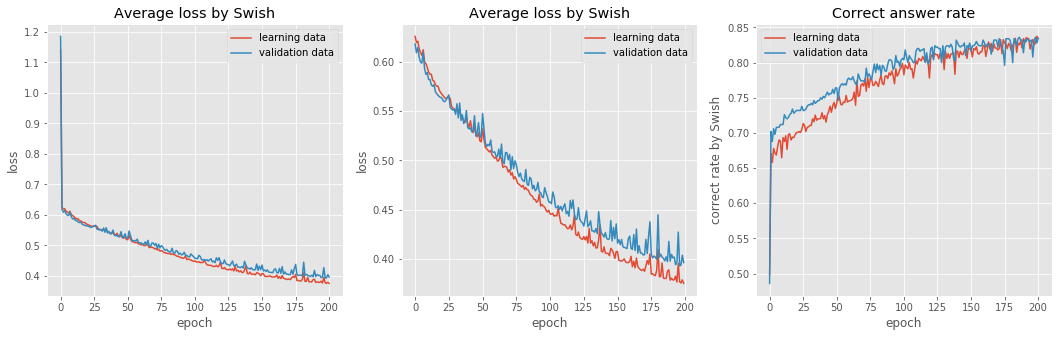

learn loss: 0.3753548973379177
valid loss: 0.396436242810443
learn prob: 83.46666666666667 %
valid prob: 83.39999999999999 %


In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(s_learn_loss, label='learning data')
plt.plot(s_valid_loss, label ='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Average loss by Swish')
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(s_learn_loss[1:], label='learning data')
plt.plot(s_valid_loss[1:], label ='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Average loss by Swish')
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(s_learn_prob, label='learning data')
plt.plot(s_valid_prob, label='validation data')
plt.xlabel('epoch')
plt.ylabel('correct rate by Swish')
plt.title('Correct answer rate')
plt.legend()
plt.show()

print(f'learn loss: {s_learn_loss[-1]}')
print(f'valid loss: {s_valid_loss[-1]}')
print(f'learn prob: {s_learn_prob[-1] * 100} %')
print(f'valid prob: {s_valid_prob[-1] * 100} %')

### Compare both

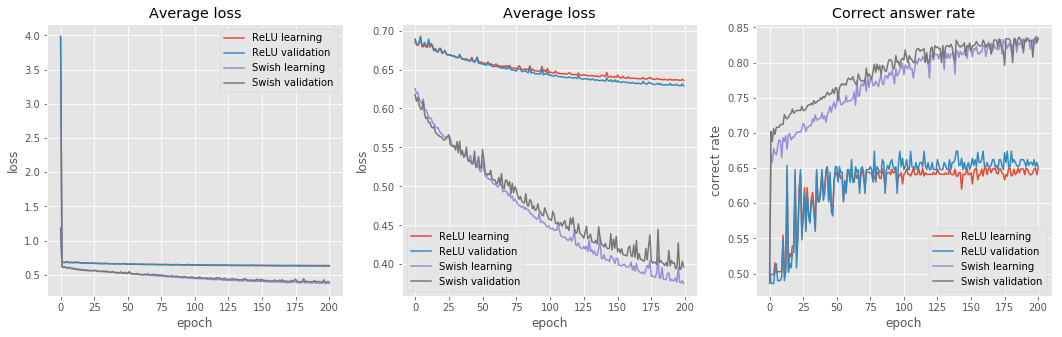

ReLU learn loss: 0.6360138325272896
ReLU valid loss: 0.628954464271289
ReLU learn prob: 65.0 %
ReLU valid prob: 65.2 %
Swish learn loss: 0.3753548973379177
Swish valid loss: 0.396436242810443
Swish learn prob: 83.46666666666667 %
Swish valid prob: 83.39999999999999 %


In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(learn_loss, label='ReLU learning')
plt.plot(valid_loss, label='ReLU validation')
plt.plot(s_learn_loss, label='Swish learning')
plt.plot(s_valid_loss, label ='Swish validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Average loss')
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(learn_loss[1:], label='ReLU learning')
plt.plot(valid_loss[1:], label='ReLU validation')
plt.plot(s_learn_loss[1:], label='Swish learning')
plt.plot(s_valid_loss[1:], label ='Swish validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Average loss')
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(learn_prob, label='ReLU learning')
plt.plot(valid_prob, label='ReLU validation')
plt.plot(s_learn_prob, label='Swish learning')
plt.plot(s_valid_prob, label='Swish validation')
plt.xlabel('epoch')
plt.ylabel('correct rate')
plt.title('Correct answer rate')
plt.legend()
plt.show()

print(f'ReLU learn loss: {learn_loss[-1]}')
print(f'ReLU valid loss: {valid_loss[-1]}')
print(f'ReLU learn prob: {learn_prob[-1] * 100} %')
print(f'ReLU valid prob: {valid_prob[-1] * 100} %')
print(f'Swish learn loss: {s_learn_loss[-1]}')
print(f'Swish valid loss: {s_valid_loss[-1]}')
print(f'Swish learn prob: {s_learn_prob[-1] * 100} %')
print(f'Swish valid prob: {s_valid_prob[-1] * 100} %')